# Dominik Strzałko - Zadanie 5.1 - 434788

# 0. Pobranie i analiza zbioru

---

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df =pd.read_csv('fires_thefts.csv', names=["Fires", "Burglary"])

In [ ]:
df.head()

,Fires,Burglary
0,6.2,29
1,9.5,44
2,10.5,36
3,7.7,37
4,8.6,53


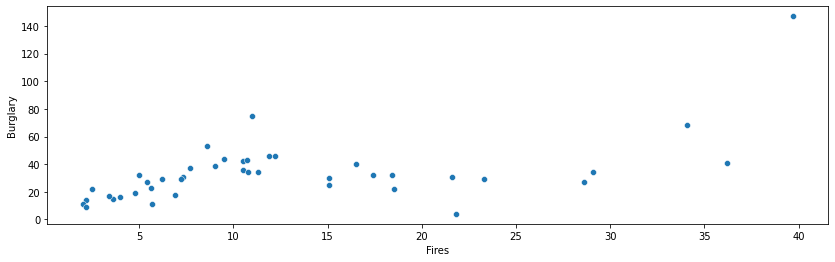

In [ ]:
plt.figure(figsize=(14,4))
sns.scatterplot(x=df['Fires'], y=df['Burglary']);

---

# 1. Podział zbioru na Test/Train

---

In [ ]:
x = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

x_train, x_test, y_train, y_test = train_test_split(x,y , test_size=0.2,train_size=0.8, random_state=37)

In [ ]:
x_train

array([[ 6.9],
       [ 2. ],
       [15.1],
       [ 5.4],
       [ 4.8],
       [28.6],
       [11.9],
       [10.5],
       [10.7],
       [29.1],
       [10.5],
       [16.5],
       [15.1],
       [ 2.2],
       [12.2],
       [ 2.5],
       [17.4],
       [10.8],
       [ 7.2],
       [ 3.4],
       [ 5. ],
       [ 7.3],
       [ 9. ],
       [ 3.6],
       [39.7],
       [18.5],
       [18.4],
       [ 7.7],
       [11.3],
       [36.2],
       [21.8],
       [ 5.7],
       [ 4. ]])

In [ ]:
x_test

array([[ 8.6],
       [21.6],
       [ 6.2],
       [ 5.6],
       [23.3],
       [ 9.5],
       [ 2.2],
       [11. ],
       [34.1]])

---

# 2. Model i jego Trening

---

In [ ]:
reg = LinearRegression().fit(x_train, y_train)

### 2.1 Theta (θ0 i θ1)


In [ ]:
print(reg.intercept_) # θ0

13.900760376688911


In [ ]:
print(reg.coef_) # θ1

[1.4337589]


### 2.2. Score

In [ ]:
score = reg.score(x_train, y_train)
print(score)

0.34183590652932017


### 2.3. Wykresy dla zbiorów Test i Train, oraz krzywa regresji liniowej

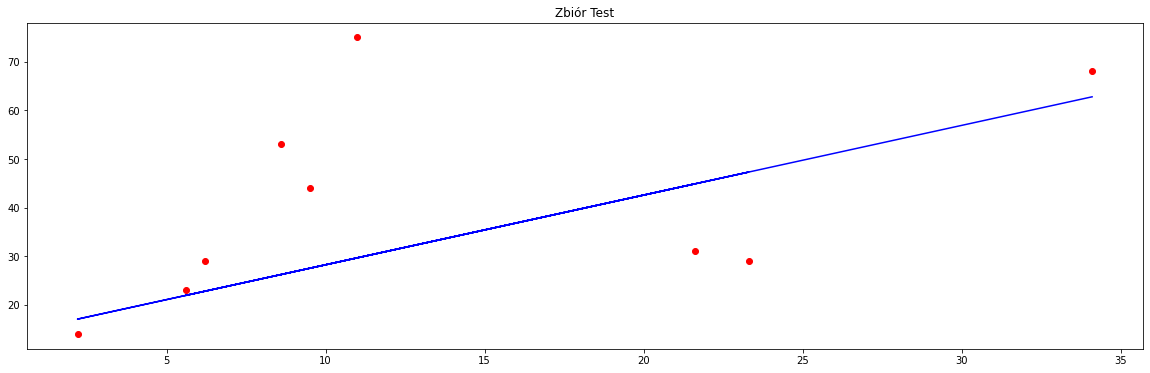

In [ ]:
plt.figure(figsize=(20,6))
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_test, reg.predict(x_test), color = 'blue')
plt.title("Zbiór Test")
plt.show()

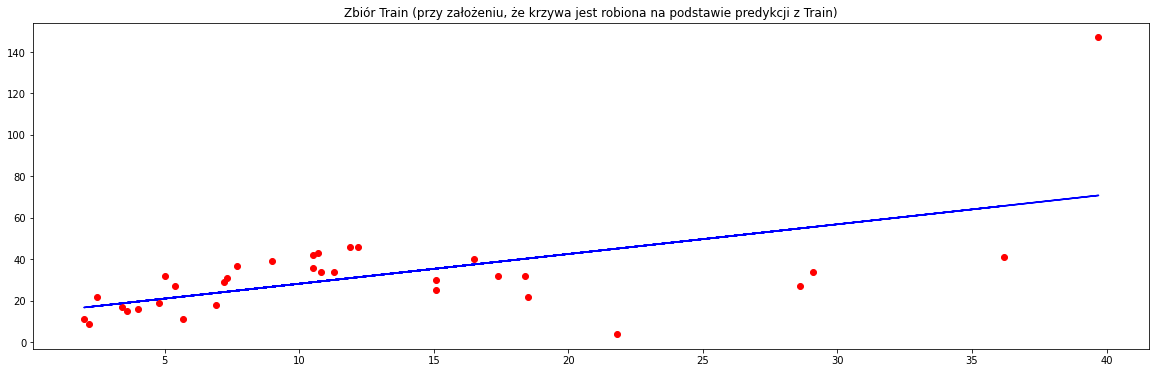

In [ ]:
plt.figure(figsize=(20,6))
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, reg.predict(x_train), color = 'blue')
plt.title("Zbiór Train (przy założeniu, że krzywa jest robiona na podstawie predykcji z Train)")
plt.show()

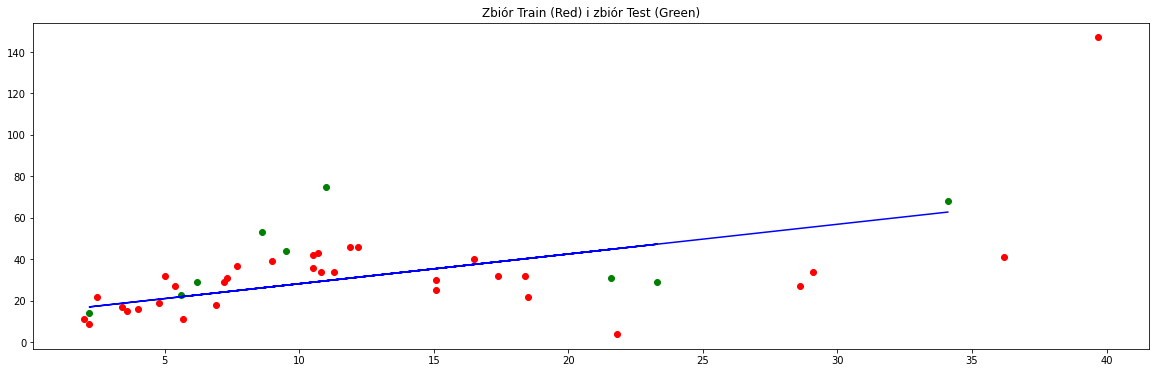

In [ ]:
plt.figure(figsize=(20,6))
plt.scatter(x_train, y_train, color = 'red')
plt.scatter(x_test, y_test, color = 'green')
plt.plot(x_test, reg.predict(x_test), color = 'blue')
plt.title("Zbiór Train (Red) i zbiór Test (Green)")
plt.show()

### 2.4. Predykcje na podstawie zbioru x_test

In [ ]:
y_pred = reg.predict(x_test)
y_pred

array([26.23108691, 44.8699526 , 22.79006555, 21.92981021, 47.30734273,
       27.52146992, 17.05502995, 29.67210827, 62.79193884])

In [ ]:
test_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) #Porównanie wartości prawidłowych z przewidzianymi
test_df

,Actual,Predicted
0,53,26.231087
1,31,44.869953
2,29,22.790066
3,23,21.929810
4,29,47.307343
5,44,27.521470
6,14,17.055030
7,75,29.672108
8,68,62.791939


In [ ]:
reg.predict([[40.0]]) #Przykładowa predykcja dla 40.0

array([71.25111634])

### 2.5. Błąd średniokwadratowy

In [ ]:
mn = mean_squared_error(y_test, y_pred)
print(mn)

405.1593905025542


### 2.6. Wyniki predykcji dla 50,100 i 200

In [ ]:
print(reg.predict([[50.0]])) #Przykładowa predykcja dla 50.0
print(reg.predict([[100.0]])) #Przykładowa predykcja dla 100.0
print(reg.predict([[200.0]])) #Przykładowa predykcja dla 200.0

[85.58870534]
[157.2766503]
[300.65254022]
